In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame([[165 , 137 , 472 , 192] , [101 , 92 , 250 , 144] , [29 , 127 ,201 , 91]] , columns = ['R&D' , 'Ops' , 'Marketing' , 'Revenue'])

In [3]:
df

,R&D,Ops,Marketing,Revenue
0,165,137,472,192
1,101,92,250,144
2,29,127,201,91


In [4]:
df['f0(x)'] = df['Revenue'].mean()

In [5]:
df

,R&D,Ops,Marketing,Revenue,f0(x)
0,165,137,472,192,142.333333
1,101,92,250,144,142.333333
2,29,127,201,91,142.333333


In [6]:
df['r1'] = df['Revenue'] - df['f0(x)']
df

,R&D,Ops,Marketing,Revenue,f0(x),r1
0,165,137,472,192,142.333333,49.666667
1,101,92,250,144,142.333333,1.666667
2,29,127,201,91,142.333333,-51.333333


In [8]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth = 3) # features = 3
reg.fit(df.iloc[: ,0:3].values , df.iloc[: , -1] )

DecisionTreeRegressor(max_depth=3)

[Text(0.4, 0.8333333333333334, 'x[0] <= 65.0\nsquared_error = 1701.556\nsamples = 3\nvalue = -0.0'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = -51.333'),
 Text(0.6, 0.5, 'x[1] <= 114.5\nsquared_error = 576.0\nsamples = 2\nvalue = 25.667'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 1.667'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 49.667')]

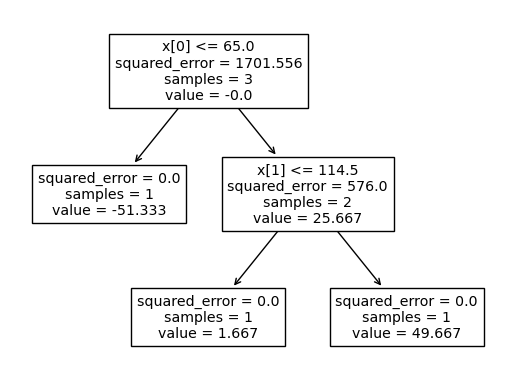

In [13]:
from sklearn.tree import plot_tree
plot_tree(reg)

In [12]:
import sklearn
print(dir(sklearn.tree))

['BaseDecisionTree', 'DecisionTreeClassifier', 'DecisionTreeRegressor', 'ExtraTreeClassifier', 'ExtraTreeRegressor', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_classes', '_criterion', '_export', '_reingold_tilford', '_splitter', '_tree', '_utils', 'export_graphviz', 'export_text', 'plot_tree']


# Step by step - Gradient Boosting

In [14]:
np.random.seed(42)
x = np.random.rand(100,1) - 0.5
y = 3*x[: , 0]**2 + 0.05 * np.random.randn(100)

In [15]:
y

array([ 5.15728987e-02,  5.94479790e-01,  1.66051606e-01, -7.01779562e-02,
        3.43985933e-01,  3.72874939e-01,  6.59764984e-01,  3.76341398e-01,
       -9.75194335e-03,  1.04794741e-01,  7.35287787e-01,  6.78883363e-01,
        3.05066318e-01,  2.73909733e-01,  3.08559932e-01,  3.49130363e-01,
        7.98606436e-02, -1.45444646e-02, -5.71096619e-03,  5.75800683e-02,
        5.23392240e-02,  4.02946793e-01,  1.29867214e-01,  4.18481141e-02,
       -6.49789982e-02,  2.22943721e-01,  2.53451786e-01, -3.95060058e-02,
        1.75570720e-02,  6.37324227e-01,  1.29006981e-01,  3.34391950e-01,
        5.80417870e-01,  6.00772381e-01,  5.54501010e-01,  2.84001079e-01,
        1.17538848e-01,  6.08765289e-01,  9.22073759e-02,  2.58225391e-02,
        4.26829699e-01, -5.83641153e-02,  7.07523289e-01,  5.40226226e-01,
        2.14112889e-01,  3.37711060e-02,  1.76497872e-01, -6.88843767e-02,
        3.58884053e-02,  4.07472924e-01,  6.12002352e-01,  1.98779325e-01,
        5.84460527e-01,  

In [16]:
df = pd.DataFrame()
df['x'] = x.reshape(100)
df['y'] = y

df

,x,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'x vs y')

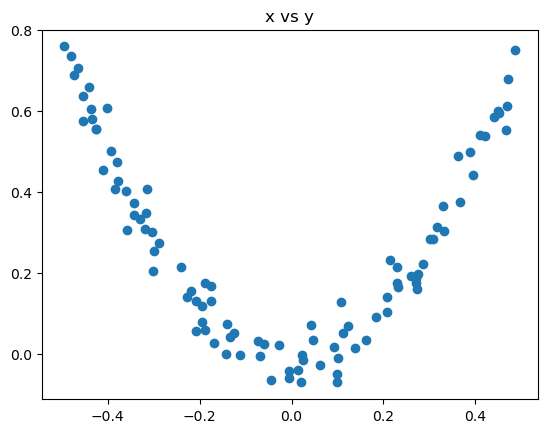

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df['x'] , df['y'])
plt.title('x vs y')

In [19]:
df['pred1'] = df['y'].mean()

In [20]:
df

,x,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [21]:
df['res1'] = df['y'] - df['pred1']

In [22]:
df

,x,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


Text(0.5, 1.0, 'x vs y')

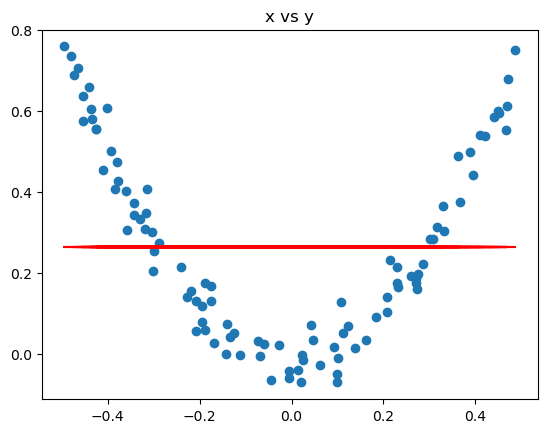

In [23]:
plt.scatter(df['x'] , df['y'])
plt.plot(df['x'] , df['pred1'] , color = 'red')
plt.title('x vs y')

In [24]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_leaf_nodes = 8)
tree1.fit(df['x'].values.reshape(100,1) , df['res1'])

DecisionTreeRegressor(max_leaf_nodes=8)

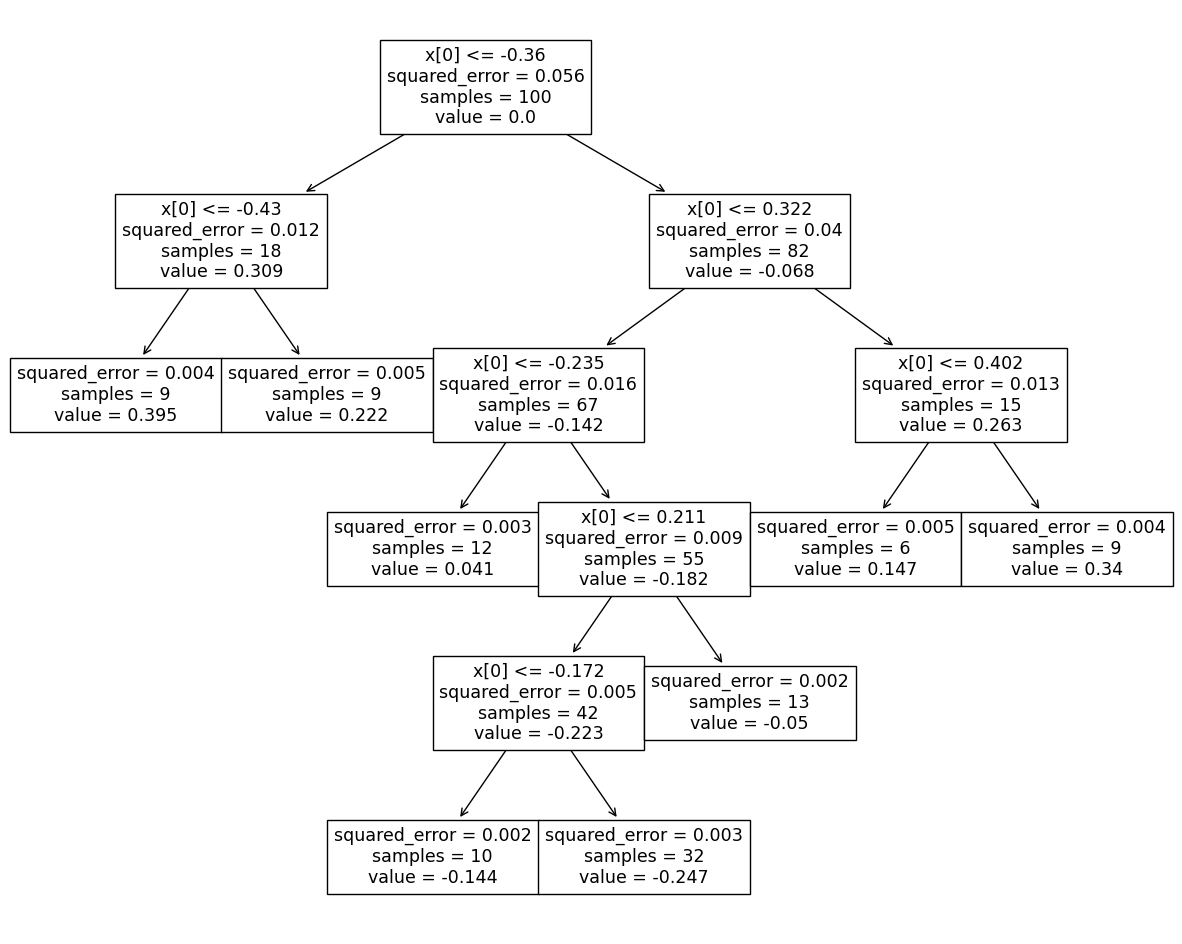

In [25]:
plt.figure(figsize = (15,12))
plot_tree(tree1)
plt.show()

In [26]:
# Generating x test data
x_test = np.linspace(-0.5,0.5,500)

In [28]:
y_pred =0.265458 + tree1.predict(x_test.reshape(500,1))

Text(0.5, 1.0, 'x vs y')

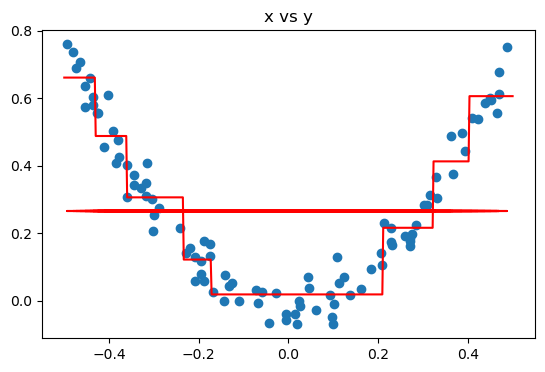

In [31]:
plt.figure(figsize = (14,4))
plt.subplot(121)
plt.plot(x_test , y_pred , color = 'red')
plt.scatter(df['x'] , df['y'])
plt.plot(df['x'] , df['pred1'] , color = 'red')
plt.title('x vs y')

In [32]:
df['pred2'] = 0.265458 + tree1.predict(df['x'].values.reshape(100,1))

In [33]:
df

,x,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [34]:
df['res2'] = df['y'] - df['pred2']

In [35]:
df

,x,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [36]:
tree2 = DecisionTreeRegressor(max_leaf_nodes = 8)
tree2.fit(df['x'].values.reshape(100,1) , df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [39]:
y_pred = 0.265458 + sum(regressor.predict(x_test.reshape(-1,1)) for regressor in [tree1 , tree2])

Text(0.5, 1.0, 'x vs y')

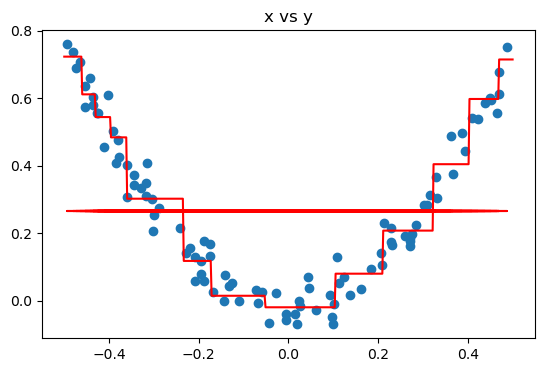

In [40]:
plt.figure(figsize = (14,4))
plt.subplot(121)
plt.plot(x_test , y_pred , color = 'red')
plt.scatter(df['x'] , df['y'])
plt.plot(df['x'] , df['pred1'] , color = 'red')
plt.title('x vs y')

In [50]:
def gradient_boosting(x,y,number , lr ,count = 1 , regs = [] , foo = None):
    if number == 0 :
        return
    else:
        if count >1:
            y = y - regs[-1].predict(x)
        else:
            foo = y
        
        tree_reg = DecisionTreeRegressor(max_depth = 5 , random_state = 42)
        tree_reg.fit(x,y)
        regs.append(tree_reg)
        
        x1 = np.linspace(-0.5,0.5,500)
        y_pred = sum(lr*regressor.predict(x1.reshape(-1,1)) for regressor in regs)
        
        print(number)
        plt.figure()
        plt.plot(x1 , y_pred , linewidth=2)
        plt.plot(x[: , 0] , foo , 'r.')
        plt.show()
        
        gradient_boosting(x,y,number -1 , lr,count+1 , regs , foo=foo)

5


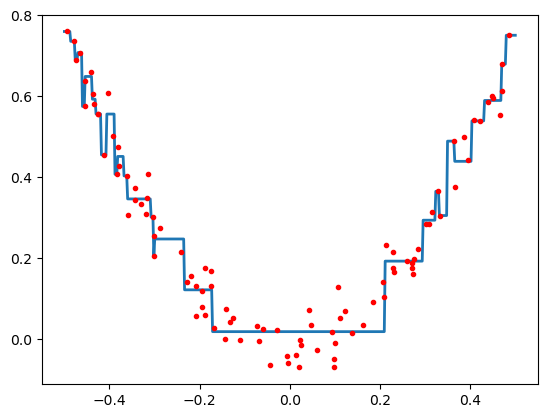

4


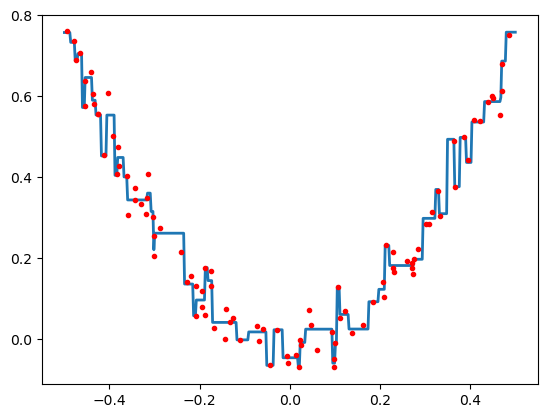

3


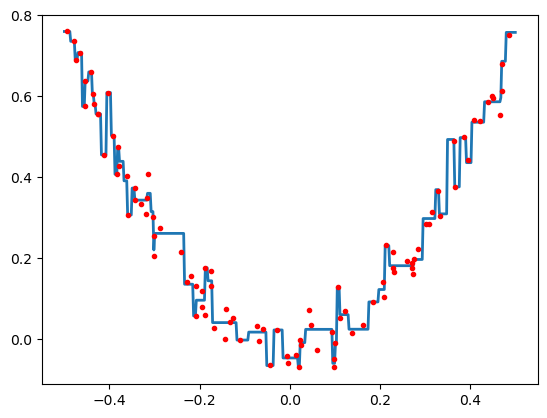

2


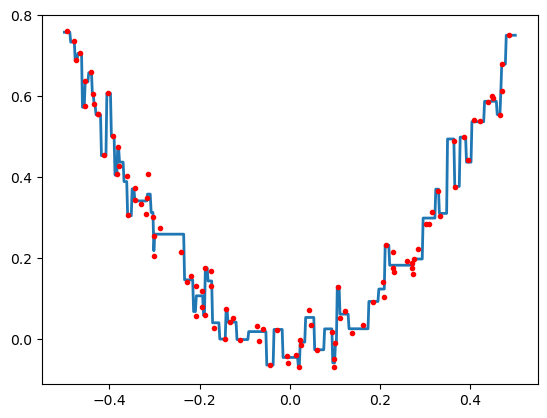

1


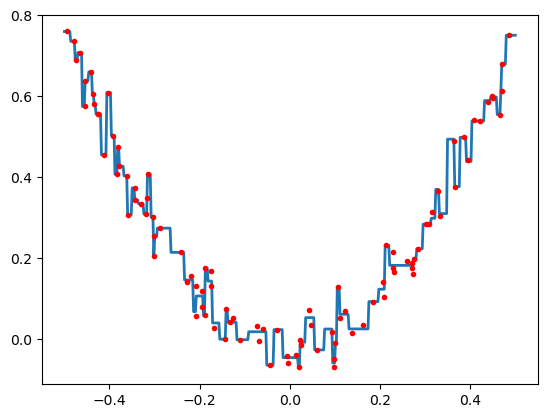

In [51]:
np.random.seed(42)
x = np.random.rand(100,1) - 0.5
y = 3*x[:,0]**2 + 0.05 * np.random.randn(100)
gradient_boosting(x,y,5,lr=1)